# **`Dataset structure Description`**


*This dataset presents a synthetic representation of mobile money transactions, meticulously crafted to mirror the complexities of real-world financial activities while integrating fraudulent behaviors for research purposes. Derived from a simulator named PaySim, which utilizes aggregated data from actual financial logs of a mobile money service in an African country, this dataset aims to fill the gap in publicly available financial datasets for fraud detection studies. It encompasses a variety of transaction types including CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER over a simulated period of 30 days, providing a comprehensive environment for evaluating fraud detection methodologies.



*   **`Usability`** :10.00
*   **`License`**: free to Share — copy and redistribute the material in any medium or format for any purpose, even commercially and also free to Adapt — remix, transform, and build upon the material for any purpose, even commercially.




*  step: Represents a unit of time in the real world, with 1 step equating to 1 hour. The total simulation spans 744 steps, equivalent to 30 days.
*  type: Transaction types include CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.


* amount: The transaction amount in the local currency.

*  
nameOrig: The customer initiating the transaction.
*   
oldbalanceOrg: The initial balance before the transaction.


*  
newbalanceOrig: The new balance after the transaction.


*   
nameDest: The transaction's recipient customer.

*   
oldbalanceDest: The initial recipient's balance before the transaction. Not applicable for customers identified by 'M' (Merchants).
*
newbalanceDest: The new recipient's balance after the transaction. Not applicable for 'M' (Merchants).

*  
isFraud: Identifies transactions conducted by fraudulent agents aiming to deplete customer accounts through transfers and cash-outs.
*
isFlaggedFraud: Flags large-scale, unauthorized transfers between accounts, with any single transaction exceeding 200,000 being considered illegal.









In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

In [ ]:
# reading the dataset
df= pd.read_csv('/content/Synthetic_Financial_datasets_log.csv')

In [ ]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (124457, 11)


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
124452,11,TRANSFER,1428231.23,C672404201,5689.00,0.00,C120609687,9660.0,1437891.23,0.0,0.0
124453,11,PAYMENT,24444.57,C50554983,95761.29,71316.72,M1302072491,0.0,0.00,0.0,0.0
124454,11,PAYMENT,9495.13,C516667550,71316.72,61821.60,M373322484,0.0,0.00,0.0,0.0
124455,11,PAYMENT,6644.65,C244871179,3025.00,0.00,M600628263,0.0,0.00,0.0,0.0


In [ ]:
print(df.describe)

<bound method NDFrame.describe of         step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
124452    11  TRANSFER  1428231.23   C672404201        5689.00   
124453    11   PAYMENT    24444.57    C50554983       95761.29   
124454    11   PAYMENT     9495.13   C516667550       71316.72   
124455    11   PAYMENT     6644.65   C244871179        3025.00   
124456    11   CASH_IN    82501.87          NaN            NaN   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155             0.0            0.00      0.0   
1            

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print("Column names in the DataFrame:")
print(df.columns)

Column names in the DataFrame:
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [ ]:
# Display concise summary of the DataFrame
print("Data Information: ",df.info)

Data Information:  <bound method DataFrame.info of         step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
124452    11  TRANSFER  1428231.23   C672404201        5689.00   
124453    11   PAYMENT    24444.57    C50554983       95761.29   
124454    11   PAYMENT     9495.13   C516667550       71316.72   
124455    11   PAYMENT     6644.65   C244871179        3025.00   
124456    11   CASH_IN    82501.87          NaN            NaN   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155             0.0            0.00      0.0

In [ ]:
# Count the occurrences of each transaction type
transaction_counts = df['type'].value_counts()

# Print the number of different types of transactions and their occurrences
print("Number of different types of transactions:", len(transaction_counts))
print("\nOccurrence values of each transaction type:")
print(transaction_counts)

Number of different types of transactions: 5

Occurrence values of each transaction type:
type
PAYMENT     48078
CASH_OUT    39349
CASH_IN     25209
TRANSFER    10650
DEBIT        1171
Name: count, dtype: int64


In [ ]:
# Handling missing values
df['isFraud'] = df['isFraud'].fillna(0)
df['isFlaggedFraud'] = df['isFlaggedFraud'].fillna(0)

In [ ]:
# Converting data types
df['step'] = df['step'].astype(int)
df['amount'] = df['amount'].astype(float)
df['oldbalanceOrg'] = df['oldbalanceOrg'].astype(float)
df['newbalanceOrig'] = df['newbalanceOrig'].astype(float)
df['oldbalanceDest'] = df['oldbalanceDest'].astype(float)
df['newbalanceDest'] = df['newbalanceDest'].astype(float)
df['isFraud'] = df['isFraud'].astype(int)
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype(int)

In [ ]:
# One-hot encoding for 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [ ]:
# Label encoding for 'nameOrig' and 'nameDest'
le_nameOrig = LabelEncoder()
le_nameDest = LabelEncoder()

df['nameOrig'] = le_nameOrig.fit_transform(df['nameOrig'])
df['nameDest'] = le_nameDest.fit_transform(df['nameDest'])

In [ ]:
# Creating new features
df['balanceOrigDiff'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceDestDiff'] = df['newbalanceDest'] - df['oldbalanceDest']
df['balanceOrigChange'] = abs(df['balanceOrigDiff'])
df['balanceDestChange'] = abs(df['balanceDestDiff'])

In [ ]:
# Feature to check if nameDest is a merchant (M)
df['isMerchant'] = df['nameDest'].apply(lambda x: 1 if str(x).startswith('M') else 0)

In [ ]:
# Additional feature engineering based on domain knowledge
df['hour'] = df['step'] % 24
df['day'] = (df['step'] // 24) % 30

In [ ]:
# Scaling numerical features
scaler = StandardScaler()
df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balanceOrigDiff', 'balanceDestDiff', 'balanceOrigChange', 'balanceDestChange']] = scaler.fit_transform(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balanceOrigDiff', 'balanceDestDiff', 'balanceOrigChange', 'balanceDestChange']])


In [ ]:
# Splitting the dataset
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [ ]:
# Drop duplicate rows
df = df.drop_duplicates()

In [ ]:
# Function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [ ]:
# Detect outliers in 'amount'
outliers_amount = detect_outliers(df, 'amount')
print(f"Number of outliers in 'amount': {outliers_amount.shape[0]}")

# remove outliers
df = df[~df.index.isin(outliers_amount.index)]

Number of outliers in 'amount': 7870


In [ ]:
# Count the occurrences of fraud labels
fraud_counts = df['isFraud'].value_counts()

# Print the number of fraud labels
print("Number of frauds:")
print(fraud_counts)

Number of frauds:
isFraud
0    116489
1        98
Name: count, dtype: int64


In [ ]:
# Compute difference between transaction amount and old balance
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['oldbalanceOrg'] = pd.to_numeric(df['oldbalanceOrg'], errors='coerce')

df['amount'].fillna(0, inplace=True)
df['oldbalanceOrg'].fillna(0, inplace=True)

df['amount_balance_diff'] = df['amount'] - df['oldbalanceOrg']

print(df)

        step    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0          1 -0.486941     14754      -0.257692       -0.263421     38418   
1          1 -0.510123     42718      -0.309920       -0.312217     40008   
2          1 -0.515016     19448      -0.317310       -0.318930     10895   
3          1 -0.515016    114183      -0.317310       -0.318930      9695   
4          1 -0.481626     67287      -0.302797       -0.308581     19793   
...      ...       ...       ...            ...             ...       ...   
124451    11 -0.415283    100173      -0.288955       -0.302819     49496   
124453    11 -0.444488     92399      -0.283782       -0.294234     21555   
124454    11 -0.487942     93169      -0.292357       -0.297522     46497   
124455    11 -0.496228     75628      -0.316313       -0.318930     52115   
124456    11 -0.275731    124455       0.000000             NaN     62212   

        oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  ...  \
0  

In [ ]:
# Calculate transaction frequency for each account
transaction_frequency = df['nameOrig'].value_counts().to_dict()

# Use .loc to set the new column
df.loc[:, 'transaction_frequency'] = df['nameOrig'].map(transaction_frequency)

print(df)

        step    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0          1 -0.486941     14754      -0.257692       -0.263421     38418   
1          1 -0.510123     42718      -0.309920       -0.312217     40008   
2          1 -0.515016     19448      -0.317310       -0.318930     10895   
3          1 -0.515016    114183      -0.317310       -0.318930      9695   
4          1 -0.481626     67287      -0.302797       -0.308581     19793   
...      ...       ...       ...            ...             ...       ...   
124451    11 -0.415283    100173      -0.288955       -0.302819     49496   
124453    11 -0.444488     92399      -0.283782       -0.294234     21555   
124454    11 -0.487942     93169      -0.292357       -0.297522     46497   
124455    11 -0.496228     75628      -0.316313       -0.318930     52115   
124456    11 -0.275731    124455       0.000000             NaN     62212   

        oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  ...  \
0  

In [ ]:
# Calculating the percentage of fraudulent transactions
fraud_percentage = df['isFraud'].mean() * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage:.2f}%")

Percentage of fraudulent transactions: 0.08%


 Logistic Regression Model

In [ ]:
# Imputing missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)

# Model Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Model Accuracy: {accuracy_log_reg}")

# Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(f"Logistic Regression Confusion Matrix: \n{conf_matrix_log_reg}")

# Classification Report
class_report_log_reg = classification_report(y_test, y_pred_log_reg, zero_division=0)
print(f"Logistic Regression Classification Report: \n{class_report_log_reg}")

Logistic Regression Model Accuracy: 0.9991161819058332
Logistic Regression Confusion Matrix: 
[[24866     2]
 [   20     4]]
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24868
           1       0.67      0.17      0.27        24

    accuracy                           1.00     24892
   macro avg       0.83      0.58      0.63     24892
weighted avg       1.00      1.00      1.00     24892



Random Forest Model

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

# Ensure y_test does not contain NaNs
y_test = y_test.fillna(y_test.mode().iloc[0])

# Accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf}")

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Random Forest Confusion Matrix: \n{conf_matrix_rf}")

# Classification report
class_report_rf = classification_report(y_test, y_pred_rf, zero_division=0)
print(f"Random Forest Classification Report: \n{class_report_rf}")

Random Forest Model Accuracy: 0.9994777438534469
Random Forest Confusion Matrix: 
[[24867     1]
 [   12    12]]
Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24868
           1       0.92      0.50      0.65        24

    accuracy                           1.00     24892
   macro avg       0.96      0.75      0.82     24892
weighted avg       1.00      1.00      1.00     24892



Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

# Model Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy_dt}")

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Decision Tree Confusion Matrix: \n{conf_matrix_dt}")

# Classification Report
class_report_dt = classification_report(y_test, y_pred_dt, zero_division=0)
print(f"Decision Tree Classification Report: \n{class_report_dt}")


Decision Tree Model Accuracy: 0.9990760083560983
Decision Tree Confusion Matrix: 
[[24858    10]
 [   13    11]]
Decision Tree Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24868
           1       0.52      0.46      0.49        24

    accuracy                           1.00     24892
   macro avg       0.76      0.73      0.74     24892
weighted avg       1.00      1.00      1.00     24892



Distribution of Transaction Amounts

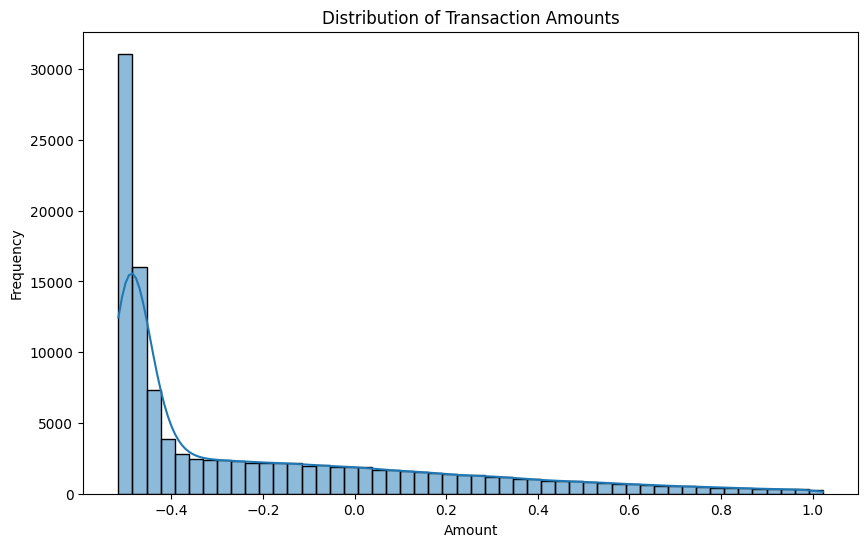

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


Correlation Heatmap

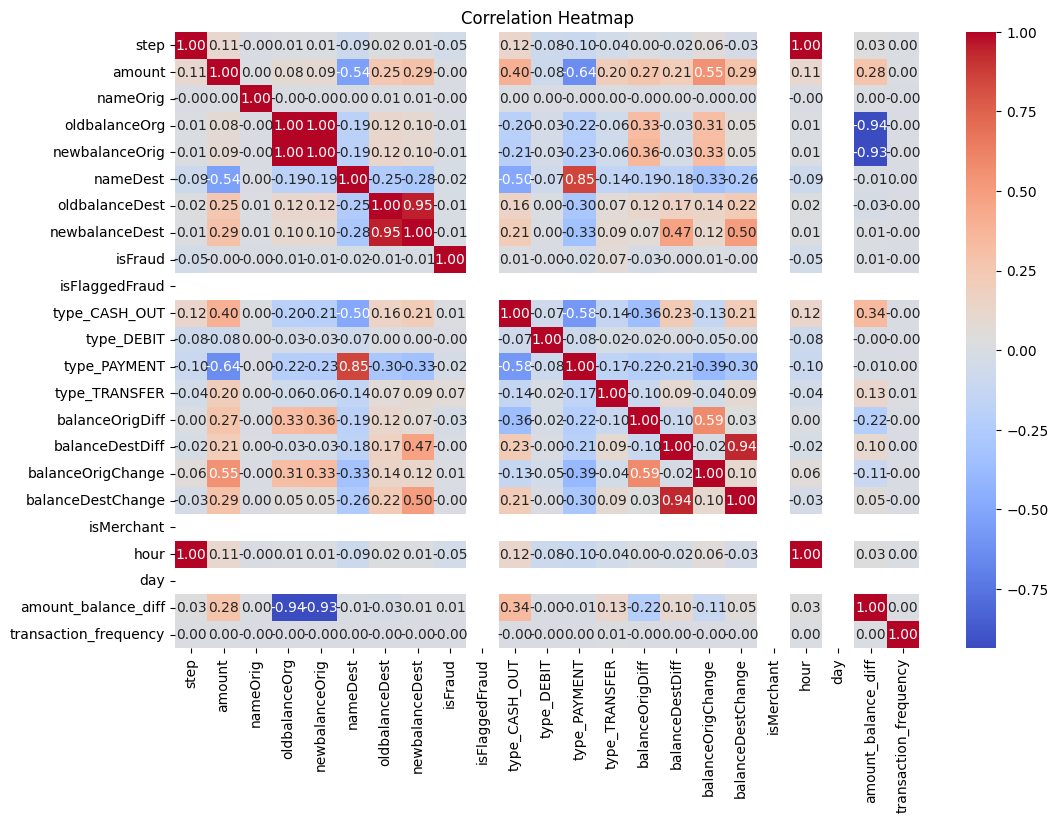

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Transaction Amounts by Fraud Status

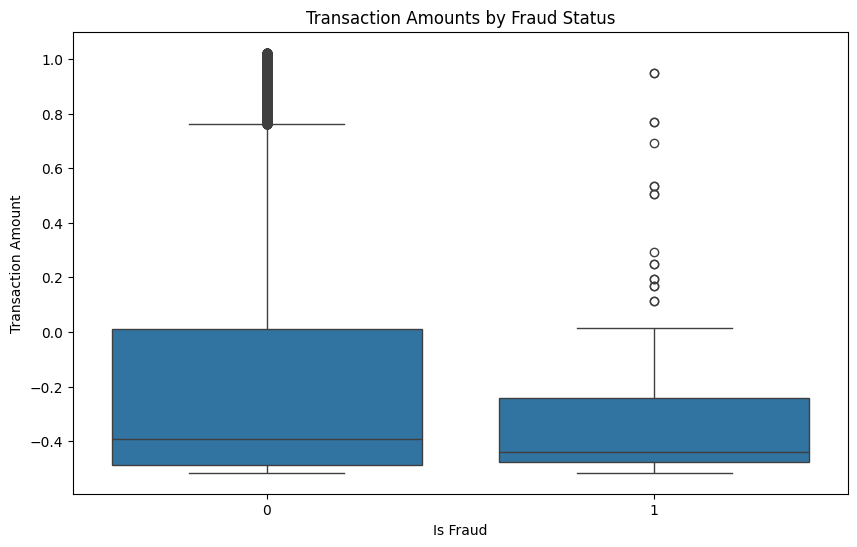

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()


Scatter Plot of Transaction Amount vs Balance

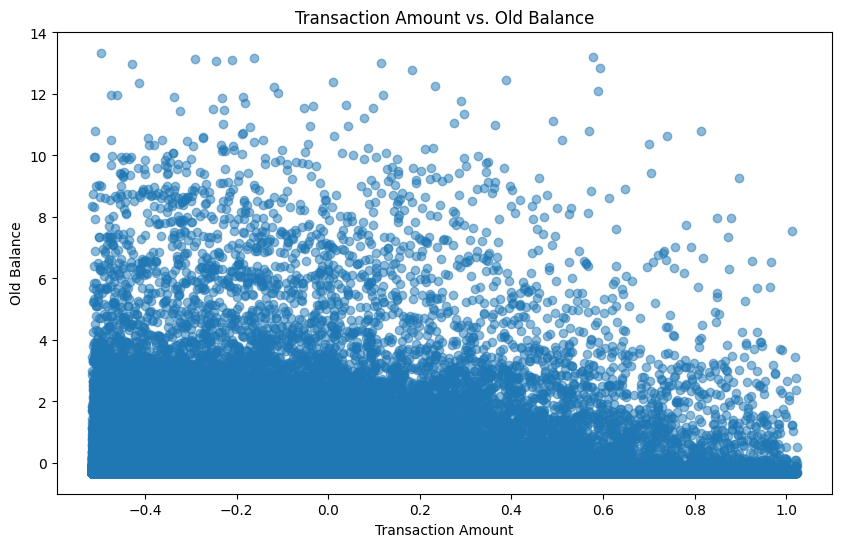

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['amount'], df['oldbalanceOrg'], alpha=0.5)
plt.title('Transaction Amount vs. Old Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('Old Balance')
plt.show()